<a href="https://colab.research.google.com/github/PrakashPednekar15/SQL-Projects/blob/main/RestaurantAggregateRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as ttp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder



In [ ]:
path1='/content/drive/MyDrive/Machine learning datasets/Dataset  (2).csv'

In [ ]:
rest_data=pd.read_csv(path1)

In [ ]:
rest_data.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [ ]:
rest_data.shape

(9551, 21)

In [ ]:
rest_data.duplicated().sum()

0

In [ ]:
rest_data.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
#dropping the null values in cuisuines
rest_data=rest_data.dropna(subset=['Cuisines'])

In [ ]:
rest_data.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [ ]:
target=rest_data['Aggregate rating'].value_counts()

In [ ]:
realno_data=rest_data.select_dtypes(include=['int','float'])
realno_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
mean=realno_data.mean()
mean

,0
Restaurant ID,9.043301e+06
Country Code,1.817921e+01
Longitude,6.427500e+01
Latitude,2.584853e+01
Average Cost for two,1.200326e+03
Price range,1.804968e+00
Aggregate rating,2.665238e+00
Votes,1.567721e+02


In [ ]:
median=realno_data.median()
median

,0
Restaurant ID,6.002726e+06
Country Code,1.000000e+00
Longitude,7.719203e+01
Latitude,2.857044e+01
Average Cost for two,4.000000e+02
Price range,2.000000e+00
Aggregate rating,3.200000e+00
Votes,3.100000e+01


In [ ]:
std_dev=realno_data.std()
std_dev

,0
Restaurant ID,8.791967e+06
Country Code,5.645160e+01
Longitude,4.119760e+01
Latitude,1.101009e+01
Average Cost for two,1.612874e+04
Price range,9.055631e-01
Aggregate rating,1.516588e+00
Votes,4.302033e+02


Distribution of Categorical Variables

<function matplotlib.pyplot.show(close=None, block=None)>

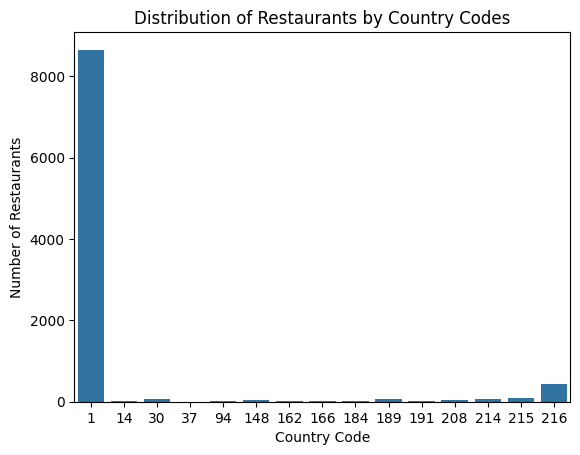

In [ ]:
#visualizing country code using countplot
sns.countplot(x=rest_data['Country Code'])
#labelling the countplot
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')
plt.show

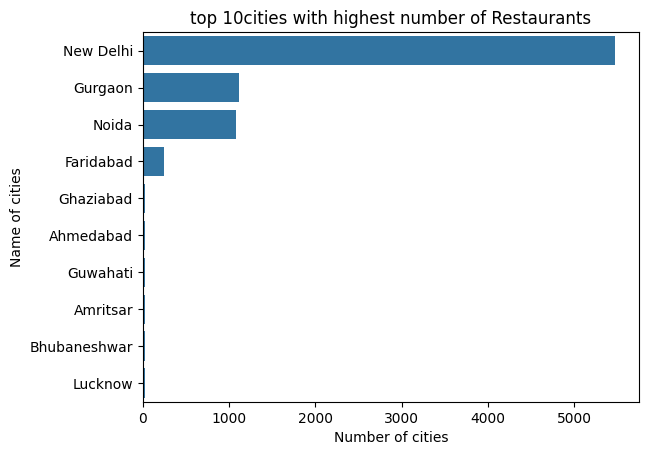

In [ ]:
#Visualizing Cities on countplot
sns.countplot(y=rest_data['City'], order=rest_data.City.value_counts().iloc[:10].index)
#labelling the countplot
plt.xlabel('Number of cities')
plt.ylabel('Name of cities')
plt.title('top 10cities with highest number of Restaurants')
plt.show()

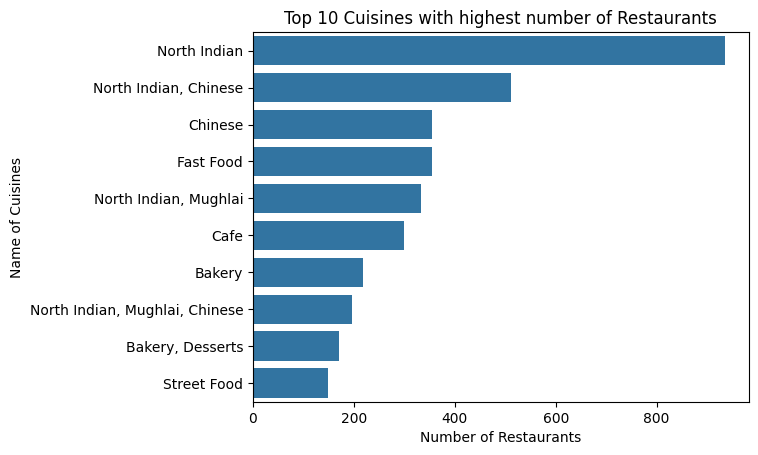

In [ ]:
#visualizing cuisines on countplot
sns.countplot(y=rest_data['Cuisines'],order=rest_data.Cuisines.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with highest number of Restaurants')
plt.show()

Data Preprocessing

In [ ]:
rest_data = rest_data.drop('Restaurant ID', axis=1)
rest_data= rest_data.drop('Restaurant Name', axis=1)
rest_data= rest_data.drop('Country Code', axis=1)
rest_data= rest_data.drop('City', axis=1)
rest_data= rest_data.drop('Address', axis=1)
rest_data = rest_data.drop('Locality', axis=1)
rest_data = rest_data.drop('Locality Verbose', axis=1)
rest_data= rest_data.drop('Longitude', axis=1)
rest_data = rest_data.drop('Latitude', axis=1)
rest_data = rest_data.drop('Cuisines', axis=1)
rest_data = rest_data.drop('Currency', axis=1)

In [ ]:
label_encoder = LabelEncoder()


In [ ]:
rest_data['Has Table booking'] = label_encoder.fit_transform(rest_data['Has Table booking'])
rest_data['Has Online delivery'] = label_encoder.fit_transform(rest_data['Has Online delivery'])
rest_data['Is delivering now'] = label_encoder.fit_transform(rest_data['Is delivering now'])
rest_data['Switch to order menu'] = label_encoder.fit_transform(rest_data['Switch to order menu'])
rest_data['Rating color'] = label_encoder.fit_transform(rest_data['Rating color'])
rest_data['Rating text'] = label_encoder.fit_transform(rest_data['Rating text'])
rest_data


,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


splitting data into features and targets

In [ ]:
x=rest_data.drop('Aggregate rating',axis=1)
y=rest_data['Aggregate rating']

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()


,Aggregate rating
1352,2.7
8504,2.5
879,0.0
4243,3.3
5036,3.1


In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
rsquared_value=r2_score(y_test,y_pred)
print(f'rsquared value for testing and predict data is {rsquared_value}')

rsquared value for testing and predict data is 0.38585660850556425


Calculating mean squared error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 1.42
R-squared (R2) Error: 0.39


Building Decision Tree Regressor

Building a predictive system

In [ ]:
input_data=(170,0,0,0,0,4,5,2,661)
input_nparray=np.array(input_data)
input_reshape= input_nparray.reshape(1,-1)
prediction=reg.predict(input_reshape)
print(prediction)

[3.78933302]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
